# Лабораторная работа 2.1: Полиномиальная аппроксимация

## Формулировка задачи

Решается дифференциальное уравнение $y' = x^2 + y^3$ с начальным условием $y(1) = 1$ методом полиномиальной аппроксимации.

## Методы решения

1. **Полиномиальная аппроксимация:** разложение решения в ряд Тейлора вокруг точки $x_0 = 1$
   - Полином 4-й степени: $y(x) = 1 + 2(x-1) + 4(x-1)^2 + \frac{25}{3}(x-1)^3 + \frac{81}{4}(x-1)^4$
   - Полином 5-й степени: добавляется член $\frac{1027}{20}(x-1)^5$

2. **Численные методы:**
   - Метод Рунге-Кутты 4-го порядка (RK4)
   - SciPy solve_ivp (RK45)

## Сравнение методов

Сравниваются точность и сходимость полиномиальной аппроксимации с численными методами на различных точках сетки.


In [1]:
# 1095. y' = x^2 + y^3
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

x_0 = 1
y_0 = 1
dx = 1e-3
n = 300

In [2]:
# Полином 4
def poly_4(x):
    return 1 + 2 * (x - 1) + 4 * (x - 1)**2 + 25/3 * (x - 1)**3 + 81/4 * (x - 1)**4

# Полином 5
def poly_5(x):
    return 1 + 2 * (x - 1) + 4 * (x - 1)**2 + 25/3 * (x - 1)**3 + 81/4 * (x - 1)**4 + 1027/20 * (x - 1)**5

# Сетка
x_1 = x_0 + dx * n
x_vals = np.arange(x_0, x_1, dx)
XY_poly_4 = np.vectorize(poly_4)(x_vals)
XY_poly_5 = np.vectorize(poly_5)(x_vals)

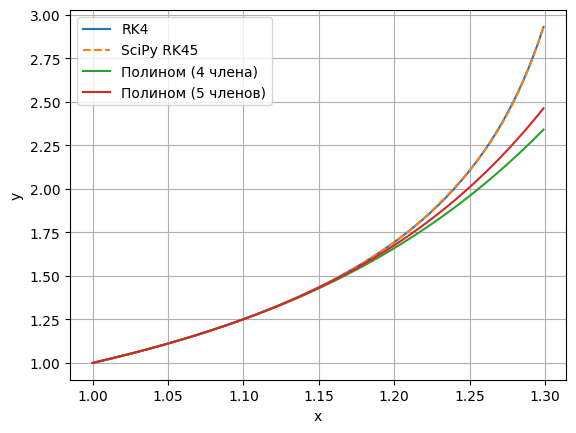

,x,RK45,RK4,Poly-4,Poly-5,Ошибка RK4,Ошибка Poly-4,Ошибка Poly-5
0,1.000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.010,1.020409,1.020409,1.020409,1.020409,6.916753e-07,6.969461e-07,6.918111e-07
2,1.050,1.111186,1.111187,1.111168,1.111184,8.694896e-07,1.755299e-05,1.506111e-06
3,1.100,1.251488,1.251051,1.250358,1.250872,4.369093e-04,1.129453e-03,6.159530e-04
4,1.200,1.693309,1.693365,1.659067,1.675499,5.582491e-05,3.424251e-02,1.781051e-02
5,1.299,2.930392,2.930181,2.340210,2.462925,2.109006e-04,5.901816e-01,4.674670e-01


In [3]:
# dy/dx = x^2 + y^3
def f(x, y):
    return x**2 + y**3

# RK4
def rk4(f, x0, y0, n=1000, dx=1e-3):
    points = np.zeros((n, 2))
    points[0] = [x0, y0]
    for i in range(1, n):
        x, y = points[i - 1]
        k1 = f(x, y)
        k2 = f(x + dx/2, y + k1 * dx/2)
        k3 = f(x + dx/2, y + k2 * dx/2)
        k4 = f(x + dx, y + k3 * dx)
        points[i] = [x + dx, y + dx * (k1 + 2 * k2 + 2 * k3 + k4) / 6]
    return points

# SciPy
def f_scipy(t, y):
    return t**2 + y**3

# сетка
x_vals = np.linspace(x_0, x_0 + (n - 1) * dx, n)

sol = solve_ivp(f_scipy, [x_0, x_0 + (n - 1) * dx], [y_0], method='RK45', t_eval=x_vals)
XY = rk4(f, x_0, y_0, n=n, dx=dx)

# Полином 4
def poly_4(x):
    return 1 + 2 * (x - 1) + 4 * (x - 1)**2 + 25/3 * (x - 1)**3 + 81/4 * (x - 1)**4

# Полином 5
def poly_5(x):
    return 1 + 2 * (x - 1) + 4 * (x - 1)**2 + 25/3 * (x - 1)**3 + 81/4 * (x - 1)**4 + 1027/20 * (x - 1)**5


XY_poly_4 = np.vectorize(poly_4)(x_vals)
XY_poly_5 = np.vectorize(poly_5)(x_vals)

plt.plot(XY[:, 0], XY[:, 1], label="RK4")
plt.plot(sol.t, sol.y[0], label="SciPy RK45", linestyle='--')
plt.plot(x_vals, XY_poly_4, label="Полином (4 члена)")
plt.plot(x_vals, XY_poly_5, label="Полином (5 членов)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

analysis_data = []


selected_indices = [0, 10, 50, 100, 200, 299] # x=1.0, 1.01, 1.05, 1.1, 1.2, 1.299

for i in selected_indices:
    x_point = x_vals[i]

    y_rk4 = XY[i, 1]
    y_rk45 = sol.y[0, i]
    y_poly4 = poly_4(x_point)
    y_poly5 = poly_5(x_point)

    # Ошибки относительно RK45
    error_rk4 = abs(y_rk4 - y_rk45)
    error_poly4 = abs(y_poly4 - y_rk45)
    error_poly5 = abs(y_poly5 - y_rk45)

    analysis_data.append({
        'x': x_point,
        'RK45': y_rk45,
        'RK4': y_rk4,
        'Poly-4': y_poly4,
        'Poly-5': y_poly5,
        'Ошибка RK4': error_rk4,
        'Ошибка Poly-4': error_poly4,
        'Ошибка Poly-5': error_poly5
    })

df = pd.DataFrame(analysis_data)
display(df)